In [31]:
import pandas as pd
# import Quandl
import quandl

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [32]:
import pandas as pd
import quandl
import math



df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [33]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#30 Days in advanced it will be 98.4% accurate

35
0.9777708812063336


In [34]:
#Chaning type of Algorithm to svm.SVR

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVR(gamma='auto') #Using different algorithm 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#35 Days in advanced it will be 81.0% accurate


35


0.7965149334982262


35
[1079.34889322 1094.05467728 1108.01688634 1102.70869191 1096.2355586
 1093.56842439 1091.95771876 1088.93262573 1082.74511246 1078.3579003
 1076.03469343 1095.38700871 1113.85516817 1118.50521638 1133.41632188
 1137.4508846  1136.17947882 1133.60846841 1135.43520358 1153.71800989
 1153.02927873 1163.1112819  1159.70035231 1167.45099521 1187.63947061
 1200.21374031 1194.55962494 1206.48361898 1212.1138499  1210.08442179
 1200.82196052 1206.46123149 1205.05707787 1140.66481691 1087.2764868 ] 0.9759509500066614 35


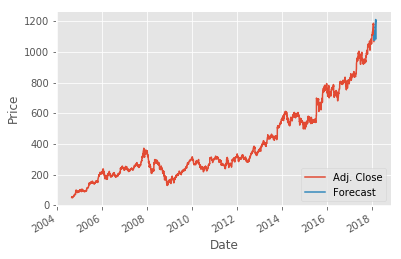

In [35]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
# print(accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

35
[1076.98791757 1091.58367155 1105.55237565 1099.70590645 1093.10763171
 1090.59933578 1089.05044134 1085.93305184 1079.78488788 1075.46727653
 1073.19516704 1093.81126544 1112.10195668 1115.71685168 1130.81663989
 1134.71488279 1132.91459266 1130.78138236 1132.38642923 1151.73115138
 1150.02591431 1159.99407916 1156.43476702 1164.48102925 1185.60675783
 1197.1727233  1191.0323434  1203.23258403 1208.57766557 1207.03192189
 1197.81153403 1203.06903725 1202.08119552 1137.16336763 1084.41566949] 0.9751952533952993 35


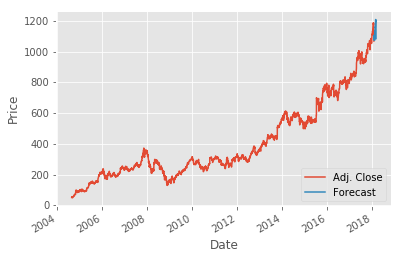

In [39]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)


#pickle classifier after it has been trained
with open('linearregression.pickle', 'wb') as f:
	pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test,y_test)
# print(accuracy)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
